In [ ]:
#After scrapping the ebay website using Parsehub, I downloaded my file as an Excel document. My column headers were 'ItemName_name','ItemName_CurrentSellingPrice','ItemName_OriginalSellingPrice','ItemName_ShippingFee','ItemName_UnitsSoldLeft
#I performed majority of my data cleaning in excel. I standardised all the column entries to make sure each column had only one data type.
#I replaced all entries of Free Shipping with $0

In [141]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
file_path = '/home/c6c8261b-6699-4e08-b11e-1a0c5c1ad477/Ebay_scrapped data.xlsx'
Ebay_df = pd.read_excel(file_path)
print(Ebay_df)

                                                                                ItemName_name  \
0                 New HP S01 Slim Desktop Computer Core i3-12100 4.30GHz 8GB 512GB SSD Win 11   
1            New HP Slim Desktop S01-aF2023w Pentium Silver J5040 3.2GHz 8GB 256GB SSD Win 11   
2                              Asus G10CE-SB564 Gaming PC i5-11400F GTX 1660TI 16GB 512GB W10   
3                         Acer Aspire Desktop Intel Celeron N4505 2.0GHz 8GB Ram 512 SSD W11H   
4                 MINIX Neo Z83-N V2.0 4GB RAM Intel Atom X5-Z8350 32GB eMMC fan less mini pc   
5              HP EliteDesk 800 G3 35W Mini PC Computer - Intel i5-6500T 2.5Ghz 8GB + Adapter   
6                HP Victus 15L TG02-0346ST Intel i5-12400 2.5 GHz 8GB DDR4 RAM 256GB SSD W11H   
7             HP T310 All-in-One 23.8" FHD IPS Display G2 Zero Client TERA2321 32MB SPI Flash   
8               Dell Precision T3600 Desktop 2.80GHz Intel Xeon E5-1603 16GB RAM NO HDD NO OD   
9                             

In [ ]:
#Now that we have our dataset loaded, we can begin data cleaning.
#Firstly we will standardize the data that is in each row!

In [108]:
Ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 1 to 1024
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ItemName_name            259 non-null    object 
 1   ItemName_CurrentSP       259 non-null    float64
 2   ItemName_OriginalSP      259 non-null    float64
 3   ItemName_ShippingFee     259 non-null    float64
 4   ItemName_Unitssoldleft   259 non-null    float64
 5   Price_Change_Percentage  259 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


In [62]:
ItemName_CurrentSP_ItemName_OriginalSP=Ebay_df[['ItemName_CurrentSP','ItemName_OriginalSP']]
print(ItemName_CurrentSP_ItemName_OriginalSP)

      ItemName_CurrentSP  ItemName_OriginalSP
0                 199.99               229.99
1                 129.99               149.99
2                 371.00              1499.99
3                 219.97               349.99
4                  25.00                32.00
5                  58.49                64.99
6                 371.00               699.99
7                  55.00               249.99
8                  78.95                98.66
9                  30.00                35.00
10                278.00               499.99
11                399.99               599.99
12                205.00               278.95
13                360.00               769.99
14                219.99               229.99
15                239.99               289.99
16                325.00               564.64
17                409.99               614.99
18                369.99               554.99
19                 53.99                54.99
20                149.99          

In [112]:
Ebay_df.isna().sum()

ItemName_name               0
ItemName_CurrentSP          1
ItemName_OriginalSP       135
ItemName_ShippingFee      131
ItemName_Unitssoldleft    759
dtype: int64

In [ ]:
#This shows that we have 1 missing value in the column ItemName_CurrentSP, 135 Missing Values in the column ItemName_OriginalSP, 131 Missing Values in the column ItemName_ShippingFee and 759 Missing values in the ItemName_Unitssoldleft

In [ ]:
#Since this dataset contains different products from different sellers, it would not be advisable to replace the missing values in any Column with the measures of central tendency.
#So I elected to eliminate the rows where there were any missing values in the columns.

In [66]:
Ebay_df_cleaned = Ebay_df.dropna(subset=['ItemName_CurrentSP', 'ItemName_OriginalSP','ItemName_Unitssoldleft'])
print(Ebay_df_cleaned)

                                                                           ItemName_name  \
1       New HP Slim Desktop S01-aF2023w Pentium Silver J5040 3.2GHz 8GB 256GB SSD Win 11   
2                         Asus G10CE-SB564 Gaming PC i5-11400F GTX 1660TI 16GB 512GB W10   
4            MINIX Neo Z83-N V2.0 4GB RAM Intel Atom X5-Z8350 32GB eMMC fan less mini pc   
6           HP Victus 15L TG02-0346ST Intel i5-12400 2.5 GHz 8GB DDR4 RAM 256GB SSD W11H   
10       HP M01-F3006 Desktop AMD Ryzen 5 5600G AMD Radeon 8 GB DDR4 RAM 256 GB SSD W11H   
11           Lenovo IdeaCentre 5 27IAH7 27" Touch AIO Intel Core i7-12700H 8GB 256GB SSD   
13        HP Victus 15L TG02-0325M Ryzen 5 5600G 3.90GHz RX 6400 8GB DDR4 256GB SSD W11H   
15        New HP S01 Slim Desktop PC & 27" Monitor 10th Gen Core i3 3.7GHz 8GB 256GB SSD   
16        HP Pavilion TP01-2137C Desktop Ryzen 5 5600G AMD Radeon 12GB 1TB HDD+256GB SSD   
17                Lenovo ThinkStation P360 Tiny Desktop i5-12500 16GB Ram 512GB 

In [68]:
Ebay_df_cleaned.isna().sum()

ItemName_name              0
ItemName_CurrentSP         0
ItemName_OriginalSP        0
ItemName_ShippingFee      21
ItemName_Unitssoldleft     0
dtype: int64

In [70]:
Ebay_df=Ebay_df_cleaned
print(Ebay_df)

                                                                           ItemName_name  \
1       New HP Slim Desktop S01-aF2023w Pentium Silver J5040 3.2GHz 8GB 256GB SSD Win 11   
2                         Asus G10CE-SB564 Gaming PC i5-11400F GTX 1660TI 16GB 512GB W10   
4            MINIX Neo Z83-N V2.0 4GB RAM Intel Atom X5-Z8350 32GB eMMC fan less mini pc   
6           HP Victus 15L TG02-0346ST Intel i5-12400 2.5 GHz 8GB DDR4 RAM 256GB SSD W11H   
10       HP M01-F3006 Desktop AMD Ryzen 5 5600G AMD Radeon 8 GB DDR4 RAM 256 GB SSD W11H   
11           Lenovo IdeaCentre 5 27IAH7 27" Touch AIO Intel Core i7-12700H 8GB 256GB SSD   
13        HP Victus 15L TG02-0325M Ryzen 5 5600G 3.90GHz RX 6400 8GB DDR4 256GB SSD W11H   
15        New HP S01 Slim Desktop PC & 27" Monitor 10th Gen Core i3 3.7GHz 8GB 256GB SSD   
16        HP Pavilion TP01-2137C Desktop Ryzen 5 5600G AMD Radeon 12GB 1TB HDD+256GB SSD   
17                Lenovo ThinkStation P360 Tiny Desktop i5-12500 16GB Ram 512GB 

In [72]:
Ebay_df.isna().sum()

ItemName_name              0
ItemName_CurrentSP         0
ItemName_OriginalSP        0
ItemName_ShippingFee      21
ItemName_Unitssoldleft     0
dtype: int64

In [ ]:
#I have elected to replace the 21 blanks in the Shipping Fee column with the mode of that column

In [74]:
Ebay_df['ItemName_ShippingFee']=Ebay_df['ItemName_ShippingFee'].fillna(Ebay_df['ItemName_ShippingFee'].mode()[0])

In [76]:
Ebay_df.isna().sum()

ItemName_name             0
ItemName_CurrentSP        0
ItemName_OriginalSP       0
ItemName_ShippingFee      0
ItemName_Unitssoldleft    0
dtype: int64

In [ ]:
#Now that we have no missing values in our dataset, we can begin our analysis

In [80]:
Ebay_df[['ItemName_CurrentSP', 'ItemName_OriginalSP', 'ItemName_ShippingFee', 'ItemName_Unitssoldleft']].describe()

,ItemName_CurrentSP,ItemName_OriginalSP,ItemName_ShippingFee,ItemName_Unitssoldleft
count,259.000000,259.000000,259.000000,259.000000
mean,530.004903,997.737336,2.214131,38.706564
std,542.760481,1091.887206,11.168504,105.236384
min,19.250000,7.990000,0.000000,1.000000
25%,209.990000,319.985000,0.000000,1.000000
50%,371.000000,699.990000,0.000000,5.000000
75%,659.990000,1199.990000,0.000000,23.000000
max,3499.990000,6999.990000,125.280000,915.000000


In [ ]:
#The mean selling price after discounts was 530.00 USD while the mean SP before discounts was 997.74 USD. The average shipping fee was 2.21 dollars.The most expensive item listed on ebay after disount was 3499.99 USD while before discounts it was 6999.99 USD. The highest shipping fee on the site was 125.28 USD

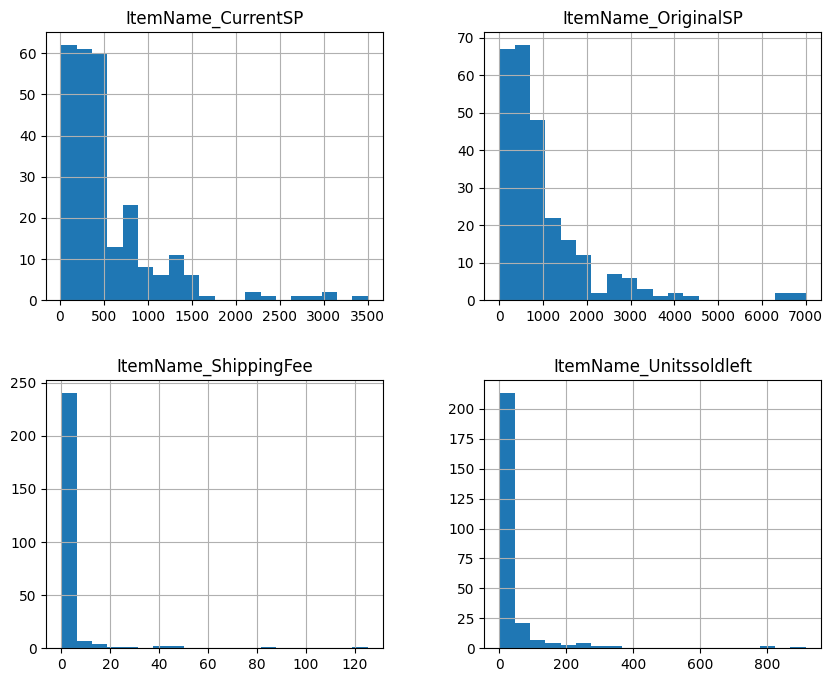

In [151]:
Ebay_df[['ItemName_CurrentSP', 'ItemName_OriginalSP', 'ItemName_ShippingFee', 'ItemName_Unitssoldleft']].hist(bins=20, figsize=(10, 8))
plt.show()

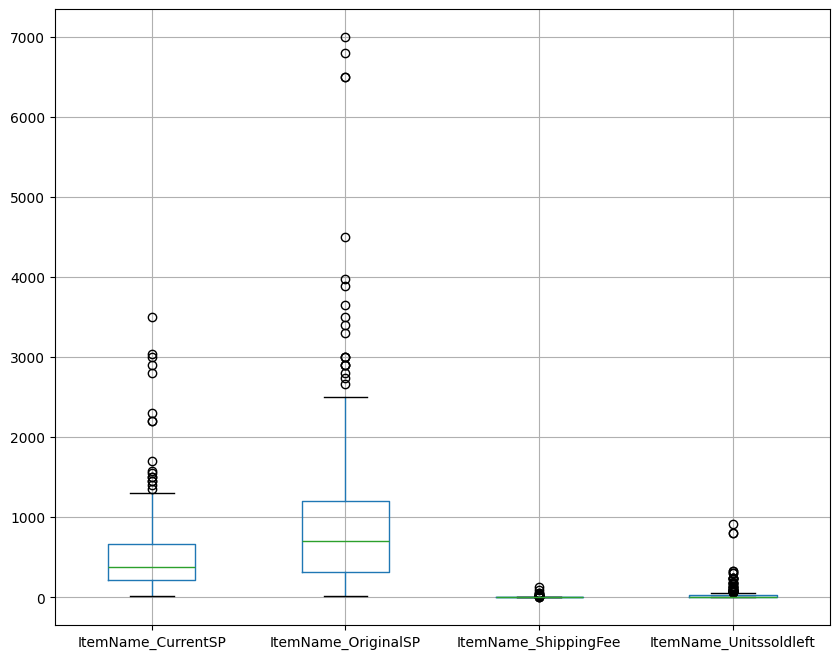

In [153]:
Ebay_df[['ItemName_CurrentSP', 'ItemName_OriginalSP', 'ItemName_ShippingFee', 'ItemName_Unitssoldleft']].boxplot(figsize=(10, 8))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

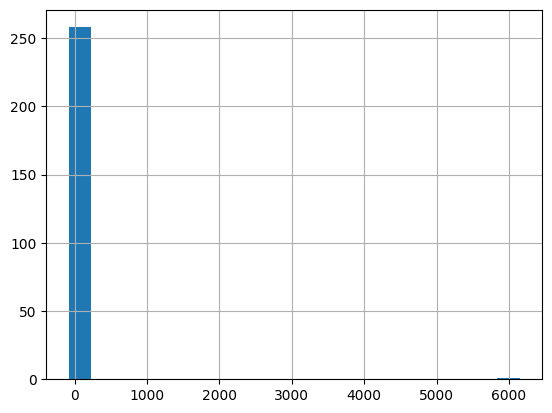

In [163]:
Ebay_df['Price_Change_Percentage'] = ((Ebay_df['ItemName_CurrentSP'] - Ebay_df['ItemName_OriginalSP']) / Ebay_df['ItemName_OriginalSP']) * 100
Ebay_df['Price_Change_Percentage'].hist(bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

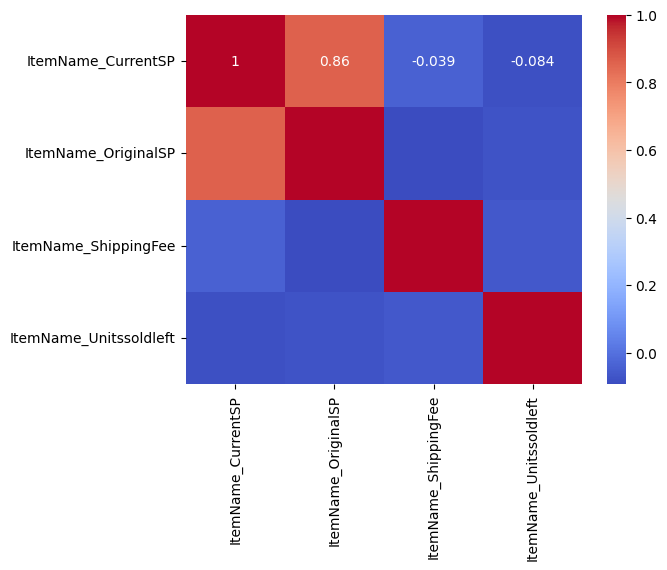

In [157]:
correlation_matrix = Ebay_df[['ItemName_CurrentSP', 'ItemName_OriginalSP', 'ItemName_ShippingFee', 'ItemName_Unitssoldleft']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show

In [159]:
Q1 = Ebay_df['ItemName_CurrentSP'].quantile(0.25)
Q3 = Ebay_df['ItemName_CurrentSP'].quantile(0.75)
IQR = Q3 - Q1
outliers = Ebay_df[(Ebay_df['ItemName_CurrentSP'] < (Q1 - 1.5 * IQR)) | (Ebay_df['ItemName_CurrentSP'] > (Q3 + 1.5 * IQR))]

In [165]:
print(outliers)

                                                                        ItemName_name  \
79   Acer Predator Orion Desktop Intel Core i9-13900KF 3GHz 32GB RAM 3TB HDD+SSD W11H   
83   Dell Alienware Aurora R16 Intel 14th Gen i9-14900KF 2TB SSD 32GB RAM Win 11 Home   
111   Lenovo ThinkStation P620 Threadripper PRO 5945WX 32GB 1TB SSD T400 No WiFi W11P   
305           Microsoft Surface Studio 2 AIO i7 16GB 1TB SSD NVIDIA GeForce LAH-00001   
318  Dell XPS 8960 i7-13700 64 1TB SSD 2TB HDD RTX 4060Ti XPS8960-7605BLK-PUS - BLACK   
347  HP OMEN 45L GT22 Gaming PC Intel i9-12900K RTX 3080 Ti 64GB 1TB SSD 2TB HDD W11P   
353  Acer Predator Orion - Desktop Intel Core i7-13700F 1.50GHz 16GB RAM 1TB SSD W11H   
357  MSI Gaming Desktop Codex R2 B14NUC7-095US Intel Core i7-14700F 32GB DDR5 2 TB PC   
365  MSI Gaming Desktop Codex R2 B14NUC7-095US Intel Core i7-14700F 32GB DDR5 2 TB PC   
385  Lenovo LEGION T7i 34IRZ8 Gaming i9-13900KF Liquid Cooling 32GB 1TB RTX 4080 W11H   
391  Dell Alienware A

In [167]:
item_counts = Ebay_df['ItemName_name'].value_counts()
print(item_counts)

ItemName_name
HP Victus 15L TG02-0346ST Intel i5-12400 2.5 GHz 8GB DDR4 RAM 256GB SSD W11H          4
HP Envy TE01 9EE52AA Desktop Intel i7-10700 2.90GHz 8GB DDR4 RAM 1TB SSD W11H         3
HP Pavilion 4B0S4AV 27" FHD IPS AIO Ryzen 3 5300U 2.6 GHz 8GB RAM 256GB SSD W11H      3
HP Pavilion 27" 4N426AV-001 FHD IPS Ryzen 5 5625U 2.3GHz 16GB RAM 512GB SSD W11H      3
Lenovo ThinkStation P3 Tower PC i9-13900 16GB RAM 512GB SSD T400 4GB WiFi W11P        2
Dell Precision 3620 Tower i5-6600 3.3GHz - 16GB - 1TB - Quadro K620 - Win10Pro        2
HP Pavilion TP01-2137C Desktop Ryzen 5 5600G AMD Radeon 12GB 1TB HDD+256GB SSD        2
Dell OptiPlex 7070 Tower Desktop, i9-9900, 3.10GHz, No Ram No HDD                     2
Raspberry Pi Zero WH (Zero W with Headers)                                            2
Lenovo ThinkStation P360 Tower Intel Core i5-12500 16GB Ram 512GB SSD W11P            2
HP Chromebox G3 Celeron 5205U 1.9 GHz Intel UHD 4GB DDR4 RAM 32GB eMMC Chrome OS      2
Lenovo ThinkStatio

<function matplotlib.pyplot.show(close=None, block=None)>

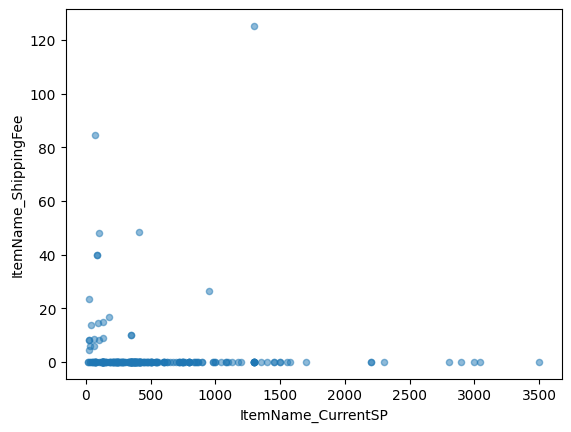

In [167]:
Ebay_df.plot.scatter(x='ItemName_CurrentSP', y='ItemName_ShippingFee', alpha=0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

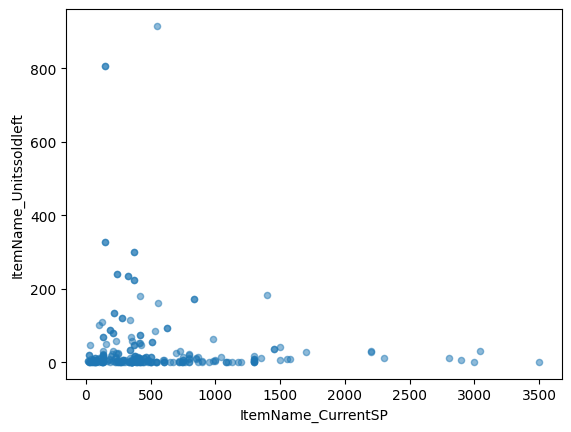

In [169]:
Ebay_df.plot.scatter(x='ItemName_CurrentSP', y='ItemName_Unitssoldleft', alpha=0.5)
plt.show